In [1]:
#set validation split = 0.2

#multiple convolutional layers, different filter sizes, different number of filters, multiple max pool layers,
#several dense layers, regularizers, dropout layers, different batch sizes or number of epochs;
#whatever gets you greater than 99%- 99.5% accuracy on the validation set.
#convolution = many small filters | multiple layers of convolution/maxpooling is usually helpful.

#For the transformer, you can use different hidden, key/query, and value dimensions, different number of heads for the MHSA layers, different number of layers

#Once you find two network structures that give you greater than 99% accuracy on the validation set, go back and train those networks on the entire training set.

#Plot a few of the numbers you misclassify from the test set.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

# Upload DataSet

11490434/11490434 [==============================] - 0s 0us/step


(0.0, 28.0, 0.0, 28.0)

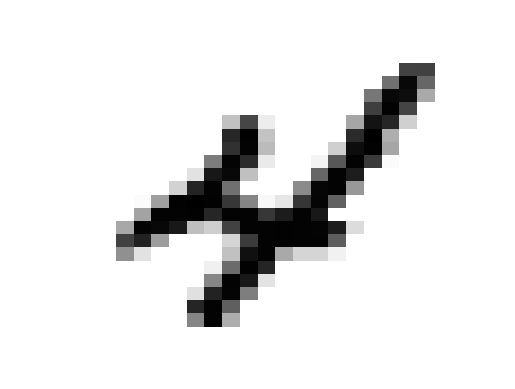

In [3]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255, x_test/255

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

plt.pcolor(1-x_train[9,::-1,:], cmap='gray')
plt.axis('off')

In [4]:
#Reshaping it to 28x28x1

x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]
xshape

(28, 28, 1)

# Convolution Neural Net

In [39]:
CNNmodel = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape), #kernel_size : size of each filter
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (4,4),strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides=3),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0004)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0004)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [40]:
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [41]:
CNNmodel.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


CNNmodel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 conv2d_31 (Conv2D)          (None, 3, 3, 128)         204928    
                                                      

In [43]:
CNNmodel.fit(x_train,y_train,epochs=50,validation_split=0.2,batch_size=300)

Epoch 1/50
160/160 [==============================] - 2s 14ms/step - loss: 0.0308 - accuracy: 0.9970 - val_loss: 0.0483 - val_accuracy: 0.9937
Epoch 2/50
160/160 [==============================] - 2s 12ms/step - loss: 0.0329 - accuracy: 0.9962 - val_loss: 0.0469 - val_accuracy: 0.9943
Epoch 3/50
160/160 [==============================] - 2s 12ms/step - loss: 0.0267 - accuracy: 0.9979 - val_loss: 0.0486 - val_accuracy: 0.9942
Epoch 4/50
160/160 [==============================] - 2s 12ms/step - loss: 0.0281 - accuracy: 0.9972 - val_loss: 0.0468 - val_accuracy: 0.9939
Epoch 5/50
160/160 [==============================] - 2s 12ms/step - loss: 0.0276 - accuracy: 0.9976 - val_loss: 0.0492 - val_accuracy: 0.9942
Epoch 6/50
160/160 [==============================] - 2s 13ms/step - loss: 0.0290 - accuracy: 0.9974 - val_loss: 0.0513 - val_accuracy: 0.9924
Epoch 7/50
160/160 [==============================] - 2s 13ms/step - loss: 0.0296 - accuracy: 0.9970 - val_loss: 0.0483 - val_accuracy: 0.9942

### Train in whole data train

In [44]:
CNNmodel.fit(x_train,y_train,epochs=20,validation_split=0,batch_size=300)

Epoch 1/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0348 - accuracy: 0.9965
Epoch 2/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0301 - accuracy: 0.9969
Epoch 3/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0260 - accuracy: 0.9976
Epoch 4/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0265 - accuracy: 0.9973
Epoch 5/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0232 - accuracy: 0.9979
Epoch 6/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0242 - accuracy: 0.9982
Epoch 7/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0241 - accuracy: 0.9982
Epoch 8/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0276 - accuracy: 0.9975
Epoch 9/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0244 - accuracy: 0.9980
Epoch 10/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0196 - accura

### Predict test

In [45]:
pred_probs2 = CNNmodel.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 1s 2ms/step
0.9961


Number of misclassifications: 39
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       980
           2       1.00      1.00      1.00      1135
           3       0.99      1.00      0.99      1032
           4       1.00      1.00      1.00      1010
           5       1.00      1.00      1.00       982
           6       1.00      0.99      0.99       892
           7       1.00      0.99      1.00       958
           8       1.00      1.00      1.00      1028
           9       1.00      0.99      1.00       974
          10       1.00      1.00      1.00      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



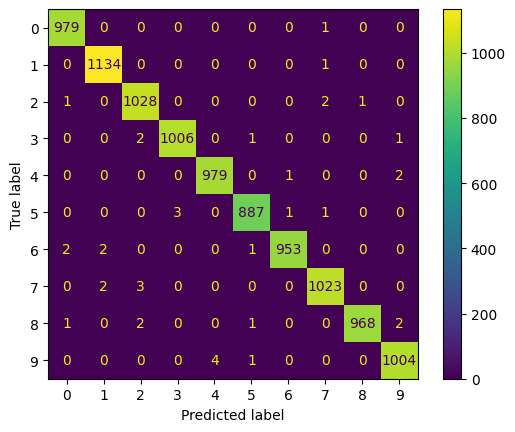

In [46]:
print(f"Number of misclassifications: {np.sum(pred2 != y_test)}")
print(classification_report(y_test, pred2, target_names=['1','2','3','4','5','6','7','8','9','10']))
# Plot confusion matrix
cm = confusion_matrix(y_test, pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='viridis', values_format='d')

plt.show()

### Save model object

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
CNNmodel.save('drive/MyDrive/UT_AUSTIN/CNNmodel_mnist')

In [50]:
CNNmodel2 = tf.keras.models.load_model('drive/MyDrive/UT_AUSTIN/CNNmodel_mnist')
pred_probs2 = CNNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

313/313 [==============================] - 1s 2ms/step
0.9961


# ViT

In [ ]:
custom_optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.003)

In [ ]:
class ClassToken(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value = w_init(shape=(1, 1, input_shape[-1]), dtype=tf.float32),
            trainable = True
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]

        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

In [ ]:
def build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes):
    # n is number of rows of blocks
    # m is number of cols of blocks
    # block_size is number of pixels (with rgb) in each block

    inp = tf.keras.layers.Input(shape=(n*m,block_size)) #input subcuadrados de imagen
    inp2 = tf.keras.layers.Input(shape=(n*m)) #for positional embedding
    mid = tf.keras.layers.Dense(hidden_dim)(inp) # transform to vectors with different dimension
    # the positional embeddings
#     positions = tf.range(start=0, limit=n*m, delta=1)
    emb = tf.keras.layers.Embedding(input_dim=n*m, output_dim=hidden_dim)(inp2) # learned positional embedding for each of the n*m possible possitions
    mid = mid + emb # for some reason, tf.keras.layers.Add causes an error, but + doesn't?
    # create and append class token to beginning of all input vectors
    token = ClassToken()(mid) # append class token to beginning of sequence
    mid = tf.keras.layers.Concatenate(axis=1)([token, mid])

    for l in range(num_layers): # how many Transformer Head layers are there?
        ln  = tf.keras.layers.LayerNormalization()(mid) # normalize
        mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,key_dim=key_dim,value_dim=key_dim)(ln,ln,ln) # self attention!
        add = tf.keras.layers.Add()([mid,mha]) # add and norm
        ln  = tf.keras.layers.LayerNormalization()(add)
        den = tf.keras.layers.Dense(mlp_dim,activation='gelu')(ln) # maybe should be relu...who knows...
        den = tf.keras.layers.Dropout(dropout_rate)(den) # regularization
        den = tf.keras.layers.Dense(hidden_dim)(den) # back to the right dimensional space
        den = tf.keras.layers.Dropout(dropout_rate)(den)
        mid = tf.keras.layers.Add()([den,add]) # add and norm again
    ln = tf.keras.layers.LayerNormalization()(mid)
    fl = ln[:,0,:] # just grab the class token for each image in batch
    clas = tf.keras.layers.Dense(num_classes,activation='softmax')(fl) # probability that the image is in each category
    mod = tf.keras.models.Model([inp,inp2],clas)
    mod.compile(optimizer=custom_optimizer2,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return mod

In [ ]:
n = 4
m = 4
block_size = 49
hidden_dim = 128
num_layers = 4
num_heads = 8
key_dim = hidden_dim//num_heads # usually good practice for key_dim to be hidden_dim//num_heads...this is why we do Multi-Head attention
mlp_dim = hidden_dim
dropout_rate = 0.1
num_classes = 10

trans = build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes)
trans.summary()

In [ ]:
x_train_ravel = np.zeros((ndata_train,n*m,block_size))
for img in range(ndata_train):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_train_ravel[img,ind,:] = x_train[img,(row*7):((row+1)*7),(col*7):((col+1)*7)].ravel()
            ind += 1

In [ ]:
x_test_ravel = np.zeros((ndata_test,n*m,block_size))
for img in range(ndata_test):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_test_ravel[img,ind,:] = x_test[img,(row*7):((row+1)*7),(col*7):((col+1)*7)].ravel()
            ind += 1

In [ ]:
pos_feed_train = np.array([list(range(n*m))]*ndata_train)
pos_feed_test = np.array([list(range(n*m))]*ndata_test)

In [ ]:
trans.fit([x_train_ravel,pos_feed_train],y_train,epochs=200,batch_size = 120,validation_split=0.2)

In [ ]:
 out = trans.evaluate([x_test_ravel,pos_feed_test],y_test)
out

In [ ]:
For the transformer, you can use different hidden, key/query, and value dimensions, different number of heads for the MHSA layers, different number of layers
